In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X=df.drop('Class',axis=1)
y=df['Class']

print(f"Shape of X : {X.shape}")
print(f"Shape of y : {y.shape}")

Shape of X : (284807, 30)
Shape of y : (284807,)


In [5]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [6]:
print(X_train_res.shape)

(426472, 30)


In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced', n_jobs=-1)

rf_model.fit(X_train_res, y_train_res)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
from sklearn.metrics import (confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve, precision_score, recall_score, f1_score, 
                            roc_auc_score, average_precision_score)


Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.82      0.84       123

    accuracy                           1.00     71202
   macro avg       0.93      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202

AUPRC: 0.8530
ROC AUC: 0.9841


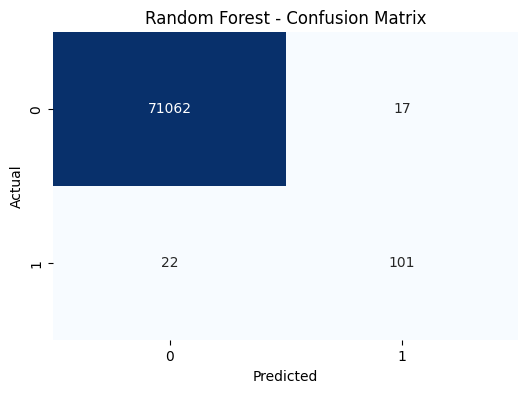

C:\Users\dhruv\AppData\Local\Temp\ipykernel_21280\1586856904.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')


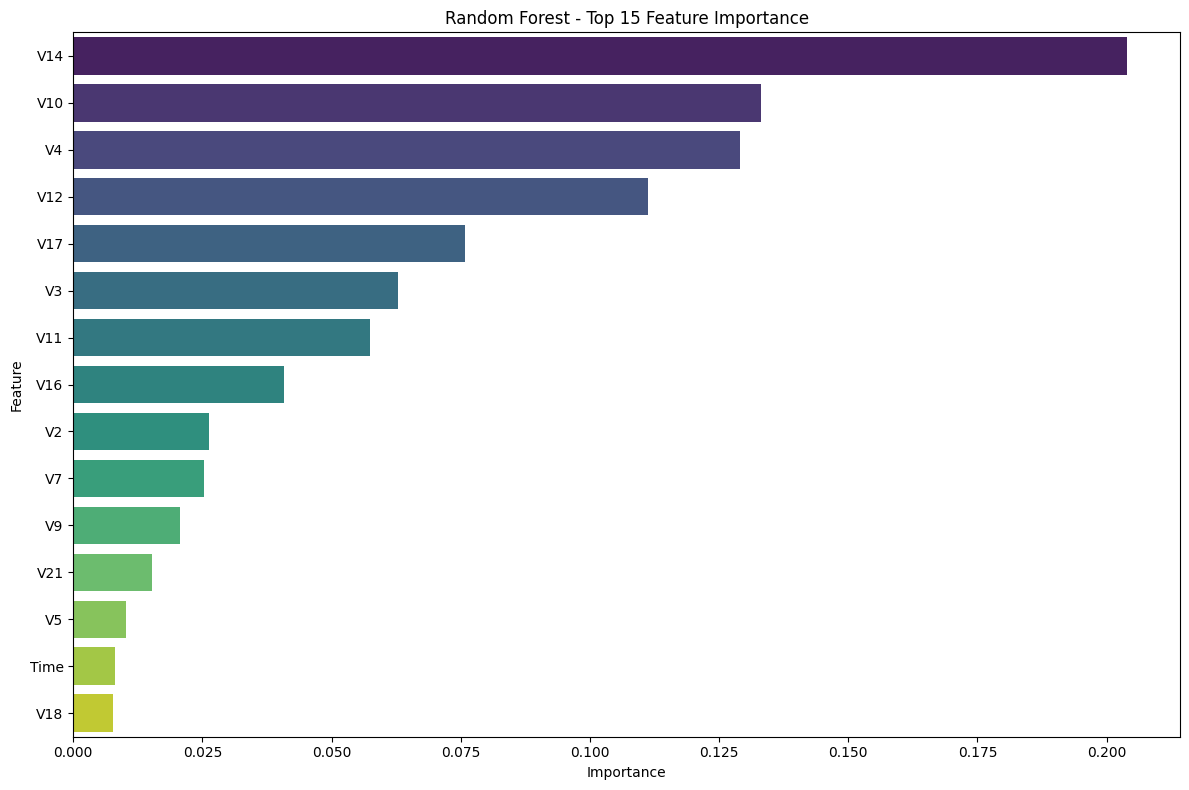

In [9]:
y_pred_rf=rf_model.predict(X_test)
y_pred_proba_rf=rf_model.predict_proba(X_test)[:,1]

print("\nRandom Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))

# Calculate AUPRC (Area Under Precision-Recall Curve)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
auprc_rf = auc(recall_rf, precision_rf)
print(f"AUPRC: {auprc_rf:.4f}")

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC: {roc_auc_rf:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title('Random Forest - Top 15 Feature Importance')
plt.tight_layout()
plt.show()

In [10]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [11]:
#xgboost
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.03, random_state=42, n_jobs=-1)

xgb_model.fit(X_train_res, y_train_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [12]:
y_pred_xgb=xgb_model.predict(X_test)
y_pred_proba_xgb=xgb_model.predict_proba(X_test)[:,1]

print("\nXGB model Evaluation")
print(classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
auprc_xgb= auc(recall_xgb, precision_xgb)
print(f"AUPRC: {auprc_xgb:.4f}")

roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC AUC: {roc_auc_xgb:.4f}")


XGB model Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.70      0.85      0.76       123

    accuracy                           1.00     71202
   macro avg       0.85      0.92      0.88     71202
weighted avg       1.00      1.00      1.00     71202

AUPRC: 0.8548
ROC AUC: 0.9809


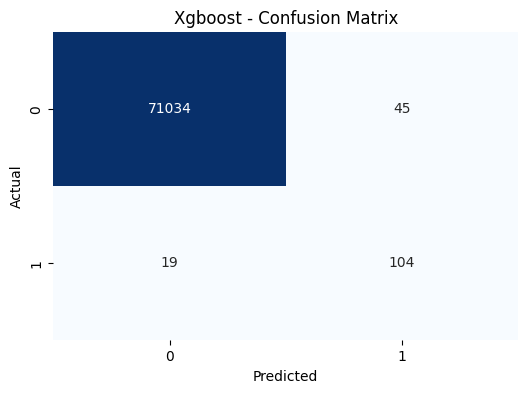

In [13]:
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Xgboost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
#lgbm
lgb_model=LGBMClassifier(n_estimators=500, learning_rate=0.03, random_state=42,class_weight='balanced', n_jobs=-1)
lgb_model.fit(X_train_res, y_train_res)

[LightGBM] [Info] Number of positive: 213236, number of negative: 213236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 426472, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.03
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [15]:
y_pred_lgb=lgb_model.predict(X_test)
y_pred_proba_lgb=lgb_model.predict_proba(X_test)[:,1]

print("\nLightGBM Model Evaluation")
print(classification_report(y_test, y_pred_lgb))

precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_pred_proba_lgb)
auprc_lgb= auc(recall_lgb, precision_lgb)
print(f"AUPRC: {auprc_lgb:.4f}")

roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
print(f"ROC AUC: {roc_auc_lgb:.4f}")


LightGBM Model Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.83      0.80       123

    accuracy                           1.00     71202
   macro avg       0.89      0.91      0.90     71202
weighted avg       1.00      1.00      1.00     71202

AUPRC: 0.8264
ROC AUC: 0.9708


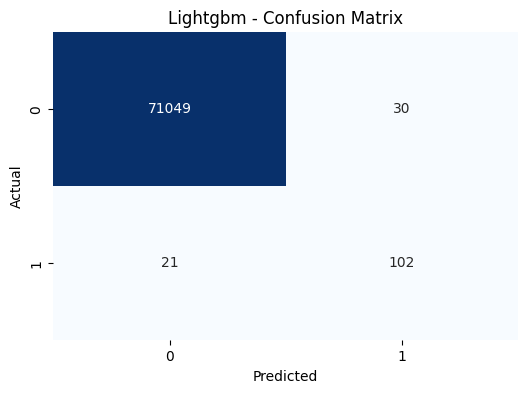

In [16]:
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Lightgbm - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
#catboost
cat_model=CatBoostClassifier(iterations=500, learning_rate=0.03, random_state=42, 
                               class_weights=[1, 99], verbose=0)
cat_model.fit(X_train, y_train)

In [18]:
y_pred_cat=cat_model.predict(X_test)
y_pred_proba_cat=cat_model.predict_proba(X_test)[:,1]

print("\nCat Model Evaluation")
print(classification_report(y_test, y_pred_cat))

precision_cat, recall_cat, _ = precision_recall_curve(y_test, y_pred_proba_cat)
auprc_cat= auc(recall_cat, precision_cat)
print(f"AUPRC: {auprc_cat:.4f}")

roc_auc_cat = roc_auc_score(y_test, y_pred_proba_cat)
print(f"ROC AUC: {roc_auc_cat:.4f}")


Cat Model Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.84      0.82       123

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202

AUPRC: 0.8437
ROC AUC: 0.9764


In [19]:
y_pred_cat=cat_model.predict(X_test)
y_pred_proba_cat=cat_model.predict_proba(X_test)[:,1]

print("\nCat Model Evaluation")
print(classification_report(y_test, y_pred_cat))

precision_cat, recall_cat, _ = precision_recall_curve(y_test, y_pred_proba_cat)
auprc_cat= auc(recall_cat, precision_cat)
print(f"AUPRC: {auprc_cat:.4f}")

roc_auc_cat = roc_auc_score(y_test, y_pred_proba_cat)
print(f"ROC AUC: {roc_auc_cat:.4f}")


Cat Model Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.84      0.82       123

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202

AUPRC: 0.8437
ROC AUC: 0.9764


In [20]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [21]:
y_pred_log=log_model.predict(X_test)
y_pred_proba_log=log_model.predict_proba(X_test)[:,1]

print("\nCat Model Evaluation")
print(classification_report(y_test, y_pred_log))

precision_log, recall_log, _ = precision_recall_curve(y_test, y_pred_proba_log)
auprc_log= auc(recall_log, precision_log)
print(f"AUPRC: {auprc_log:.4f}")

roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)
print(f"ROC AUC: {roc_auc_log:.4f}")


Cat Model Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.73      0.63      0.67       123

    accuracy                           1.00     71202
   macro avg       0.86      0.81      0.84     71202
weighted avg       1.00      1.00      1.00     71202

AUPRC: 0.5413
ROC AUC: 0.9146


In [22]:
# Neural Networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

In [24]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    X_train, y_train, epochs=50, batch_size=64, validation_split=0.2,
    class_weight={0:1, 1:10},  # helps reduce FN by penalizing frauds more
    verbose=1)

Epoch 1/50


C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9352 - loss: 529.4712 - val_accuracy: 0.9983 - val_loss: 2.5224
Epoch 2/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9856 - loss: 15.5848 - val_accuracy: 0.9982 - val_loss: 1.6734
Epoch 3/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9855 - loss: 8.6023 - val_accuracy: 0.9982 - val_loss: 1.5592
Epoch 4/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9850 - loss: 8.0925 - val_accuracy: 0.9981 - val_loss: 0.3244
Epoch 5/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9844 - loss: 5.0567 - val_accuracy: 0.9983 - val_loss: 0.8474
Epoch 6/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9861 - loss: 3.9932 - val_accuracy: 0.9981 - val_loss: 0.3036
Epoch 7/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9848 - loss: 3.8224 - val_accuracy: 0.9984 - val_loss: 0.4545
Epoch 8/50
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9785 - loss: 3.7983 - val_accu

In [25]:
y_pred_prob_nn = model.predict(X_test).ravel()
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# ROC-AUC
roc_auc_nn = roc_auc_score(y_test, y_pred_prob_nn)
print(f"ROC-AUC Score:{roc_auc_nn:.4f}")

# Precision-Recall AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_nn)
auprc_nn= auc(recall, precision)
print(f"AUPRC Score: {auprc_nn:.4f}")

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 2s 678us/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
 [[71079     0]
 [  123     0]]
ROC-AUC Score:0.4948
AUPRC Score: 0.4927


C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

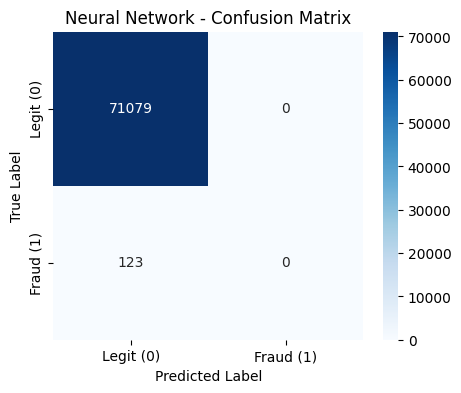

In [26]:
cm = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Legit (0)", "Fraud (1)"],
            yticklabels=["Legit (0)", "Fraud (1)"])
plt.title("Neural Network - Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [27]:
models=['Random Forest', 'XgBoost' , 'LightLgbm' , 'Catboost', 'Logistic Regression', 'Neural Network']

precision_scores=[precision_score(y_test, y_pred_rf), precision_score(y_test,y_pred_xgb), precision_score(y_test, y_pred_lgb), 
                 precision_score(y_test,y_pred_cat), precision_score(y_test,y_pred_log), precision_score(y_test, y_pred_nn)
                 ]
                

recall_scores=[recall_score(y_test, y_pred_rf), recall_score(y_test,y_pred_xgb), recall_score(y_test, y_pred_lgb), 
                 recall_score(y_test,y_pred_cat), recall_score(y_test,y_pred_log), recall_score(y_test, y_pred_nn)]

C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [28]:
F1_scores=[f1_score(y_test, y_pred_rf), f1_score(y_test,y_pred_xgb), f1_score(y_test, y_pred_lgb), 
                 f1_score(y_test,y_pred_cat), f1_score(y_test,y_pred_log), f1_score(y_test, y_pred_nn)]

In [29]:
auprc_scores=[auprc_rf, auprc_xgb, auprc_lgb, auprc_cat, auprc_log, auprc_nn]
roc_auc_scores=[roc_auc_rf, roc_auc_xgb, roc_auc_lgb, roc_auc_cat, roc_auc_log, roc_auc_nn]

In [30]:
model_comparison=pd.DataFrame({
    'Model': models,
    'Precision': precision_scores,
    'Recall':recall_scores,
    'F1_Scores':F1_scores,
    'auprc_scores':auprc_scores,
    'roc_auc_scores': roc_auc_scores
})

In [31]:
# Sort by AUPRC (recommended metric for imbalanced datasets)
model_comparison = model_comparison.sort_values(by='auprc_scores', ascending=False).reset_index(drop=True)

In [32]:
model_comparison.head()

,Model,Precision,Recall,F1_Scores,auprc_scores,roc_auc_scores
0,XgBoost,0.697987,0.845528,0.764706,0.854787,0.980888
1,Random Forest,0.855932,0.821138,0.838174,0.853021,0.984132
2,Catboost,0.811024,0.837398,0.824000,0.843695,0.976427
3,LightLgbm,0.772727,0.829268,0.800000,0.826426,0.970752
4,Logistic Regression,0.726415,0.626016,0.672489,0.541312,0.914579
